In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet,ElasticNetCV,Ridge,RidgeCV,Lasso,LassoCV,LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
sns.set()
pd.set_option('display.max_rows',None)

C:\Anaconda\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Anaconda\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).ep

In [2]:
dataset = pd.read_csv('diabetes.csv')

In [3]:
data = dataset.copy()

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.shape

(768, 9)

In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

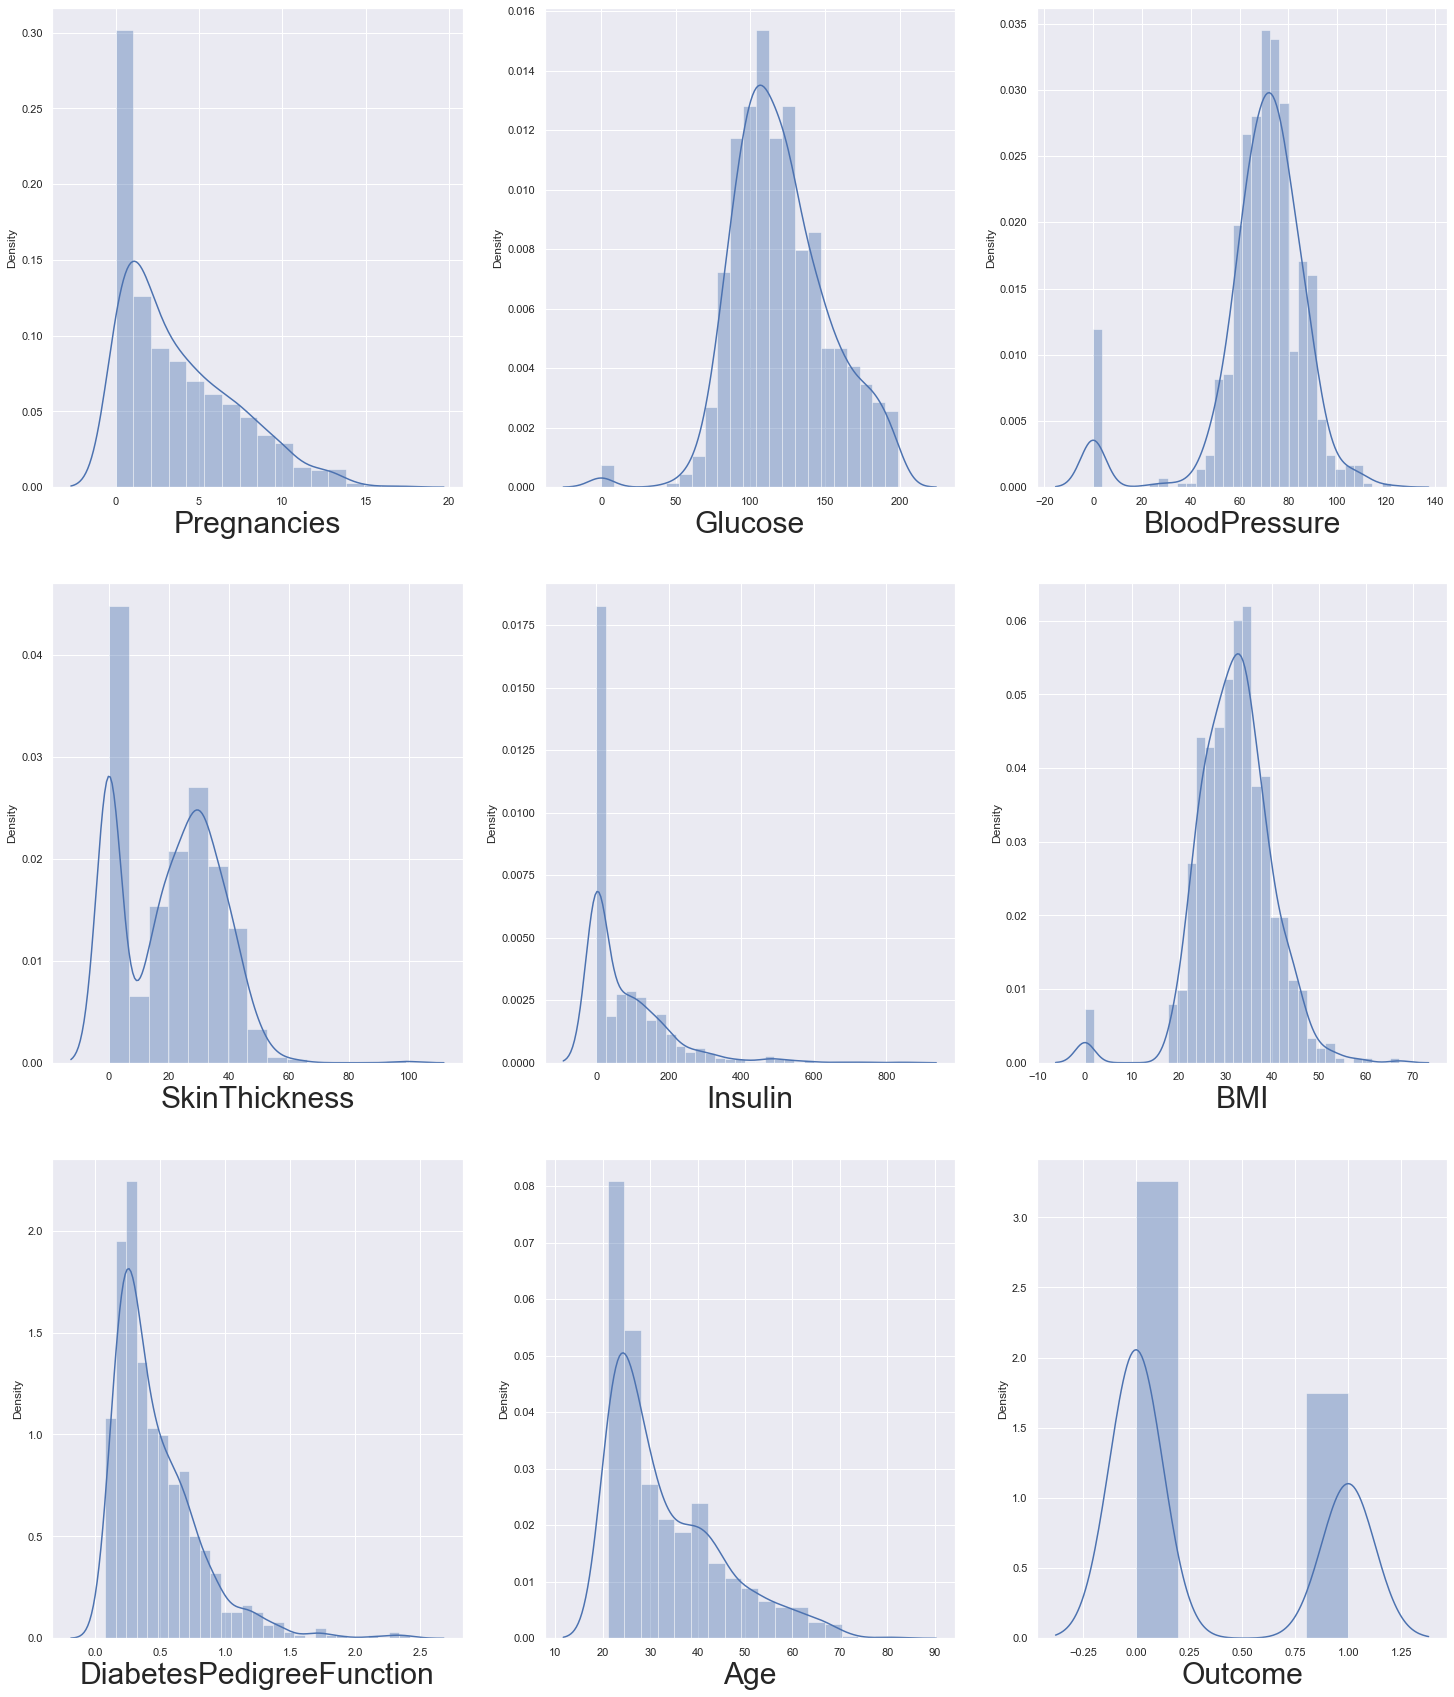

In [8]:
plt.figure(figsize=(25,30),facecolor='white')
plotnumber = 1
for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=30)
    plotnumber += 1

plt.show()
    
        

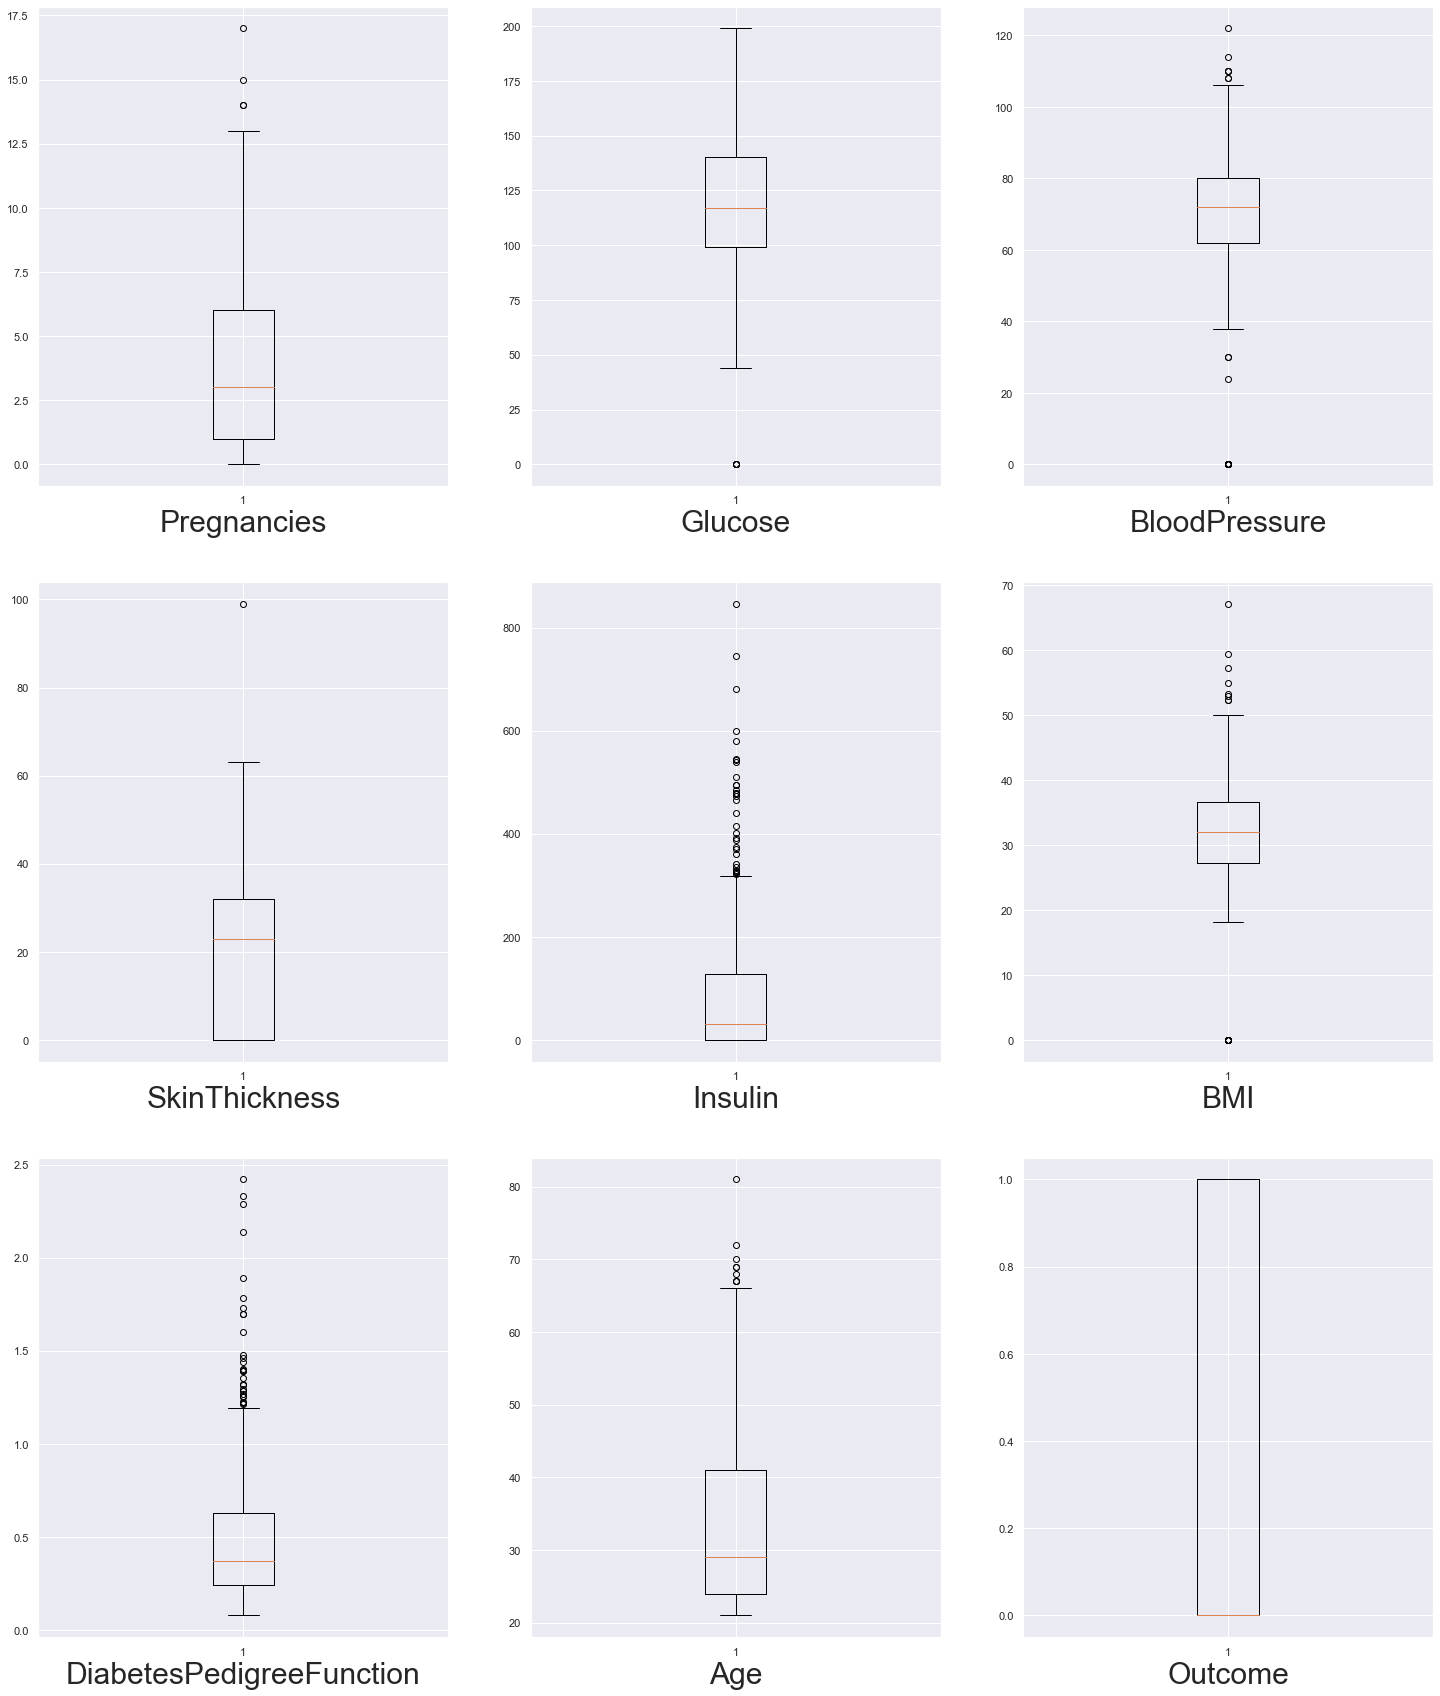

In [9]:
plt.figure(figsize=(25,30),facecolor= 'white')
plotnumber = 1
for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        plt.boxplot(data[column])
        plt.xlabel(column,fontsize=30)        
    plotnumber += 1
plt.show()


In [10]:
lst = [name for name in data.columns]

In [11]:
lst

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [12]:
df = data

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


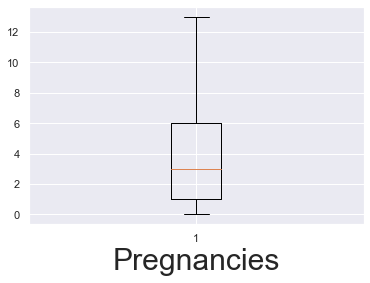

In [14]:
q_Pregnancies = df['Pregnancies'].quantile(0.995)
data_cleaned = df[df['Pregnancies']<q_Pregnancies]
plt.boxplot(data_cleaned['Pregnancies'])
plt.xlabel('Pregnancies',fontsize=30)
plt.show()

In [15]:
q_Glucose = data_cleaned['Glucose'].quantile(0.01)
q_Glucose

57.0

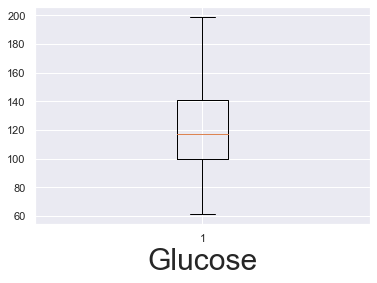

In [16]:

data_cleaned = data_cleaned[data_cleaned['Glucose']>q_Glucose]
plt.boxplot(data_cleaned['Glucose'])
plt.xlabel('Glucose',fontsize=30)
plt.show()

In [17]:
q_BloodPressure = data_cleaned['BloodPressure'].quantile(0.995)
q1_BloodPressure = data_cleaned['BloodPressure'].quantile(0.06)
q_BloodPressure,q1_BloodPressure

(110.0, 46.47999999999999)

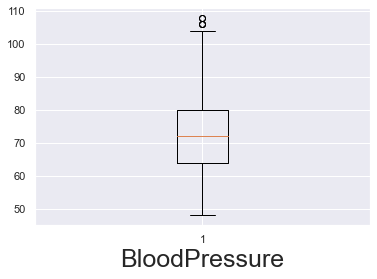

In [18]:

data_cleaned = data_cleaned[data_cleaned['BloodPressure']<q_BloodPressure]
data_cleaned = data_cleaned[data_cleaned['BloodPressure']>q1_BloodPressure]
plt.boxplot(data_cleaned['BloodPressure'])
plt.xlabel('BloodPressure',fontsize=25)
plt.show()

In [19]:
q_SkinThickness = data_cleaned['SkinThickness'].quantile(0.99)
q_SkinThickness

51.97000000000003

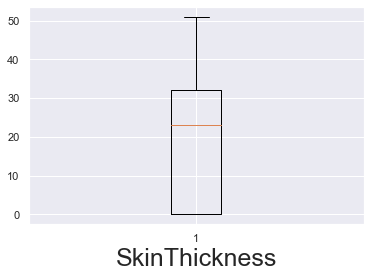

In [20]:
data_cleaned = data_cleaned[data_cleaned['SkinThickness']<q_SkinThickness]
plt.boxplot(data_cleaned['SkinThickness'])
plt.xlabel('SkinThickness',fontsize=25)
plt.show()

In [21]:
q_Insulin = data_cleaned['Insulin'].quantile(0.945)
q_Insulin

292.54999999999995

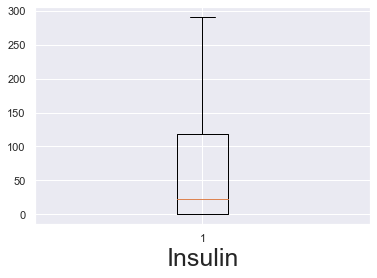

In [22]:
data_cleaned = data_cleaned[data_cleaned['Insulin']<q_Insulin]
plt.boxplot(data_cleaned['Insulin'])
plt.xlabel('Insulin',fontsize=25)
plt.show()

In [23]:
q_BMI = data_cleaned['BMI'].quantile(0.99)
q1_BMI = data_cleaned['BMI'].quantile(0.006)

q_BMI,q1_BMI

(48.51999999999997, 17.0352)

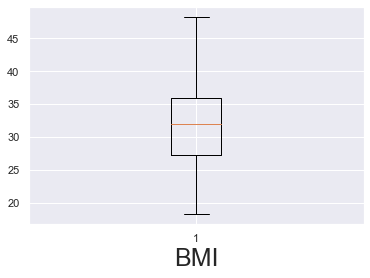

In [24]:
data_cleaned = data_cleaned[data_cleaned['BMI']<q_BMI]
data_cleaned = data_cleaned[data_cleaned['BMI']>q1_BMI]
plt.boxplot(data_cleaned['BMI'])
plt.xlabel('BMI',fontsize=25)
plt.show()

In [25]:
q_DiabetesPedigreeFunction = data_cleaned['DiabetesPedigreeFunction'].quantile(0.94)
q_DiabetesPedigreeFunction

1.040899999999999

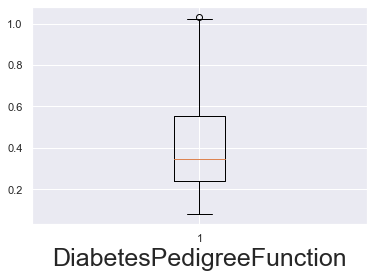

In [26]:
data_cleaned = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q_DiabetesPedigreeFunction]
plt.boxplot(data_cleaned['DiabetesPedigreeFunction'])
plt.xlabel('DiabetesPedigreeFunction',fontsize=25)
plt.show()

In [27]:
q_Age = data_cleaned['Age'].quantile(0.962)
q_Age

60.0

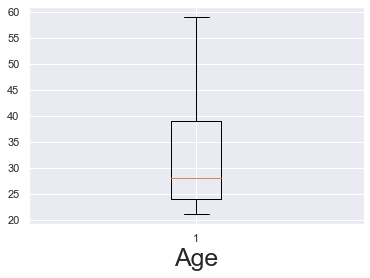

In [28]:
data_cleaned = data_cleaned[data_cleaned['Age']<q_Age]
plt.boxplot(data_cleaned['Age'])
plt.xlabel('Age',fontsize=25)
plt.show()

In [29]:
data_cleaned.shape

(581, 9)

In [30]:
#df.shape

In [31]:
#data_cleaned.head()

In [32]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [33]:
len(df)

768

In [34]:
data_cleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


In [35]:
for column in df.columns:
    if column == "Pregnancies":
        mean = math.ceil(data_cleaned[column].mean())
        for i in range(len(df)):
            outlier = df[column][i]
            if outlier > q_Pregnancies:
                df[column].replace(outlier,q_Pregnancies,inplace=True)
            df[column].replace(0,mean,inplace=True)
    if column == "Glucose":
        mean = data_cleaned[column].mean()
        for i in range(len(df)):
            outlier = df[column][i]
            if outlier < q_Glucose:
                df[column].replace(outlier,q_Glucose,inplace=True)
            df[column].replace(0,mean,inplace=True)
    if column == "BloodPressure":
        mean = data_cleaned[column].mean()
        for i in range(len(df)):
            outlier = df[column][i]
            if outlier > q_BloodPressure:
                df[column].replace(outlier,q_BloodPressure,inplace=True)
            df[column].replace(0,mean,inplace=True)
    if column == "SkinThickness":
        mean = data_cleaned[column].mean()
        for i in range(len(df)):
            outlier = df[column][i]
            if outlier > q_SkinThickness:
                df[column].replace(outlier,q_SkinThickness,inplace=True)
            df[column].replace(0,mean,inplace=True)
    if column == "Insulin":
        median = data_cleaned[column].median()
        for i in range(len(df)):
            outlier = df[column][i]
            if outlier > q_Insulin:
                df[column].replace(outlier,q_Insulin,inplace=True)
            df[column].replace(0,median,inplace=True)
    if column == "BMI":
        mean = data_cleaned[column].mean()
        for i in range(len(df)):
            outlier = df[column][i]
            if outlier > q_BMI:
                df[column].replace(outlier,q_BMI,inplace=True)
            df[column].replace(0,mean,inplace=True)
    if column == "DiabetesPedigreeFunction":
        median = data_cleaned[column].median()
        for i in range(len(df)):
            outlier = df[column][i]
            if outlier > q_DiabetesPedigreeFunction:
                df[column].replace(outlier,q_DiabetesPedigreeFunction,inplace=True)
            df[column].replace(0,median,inplace=True)
    if column == "Age":
        median = math.ceil(data_cleaned[column].median())
        for i in range(len(df)):
            outlier = df[column][i]
            if outlier > q_Age:
                df[column].replace(outlier,q_Age,inplace=True)
            df[column].replace(0,median,inplace=True)
    

In [36]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,41.0,33.6,0.6270,50,1
1,1.0,85.0,66.0,29.000000,41.0,26.6,0.3510,31,0
2,8.0,183.0,64.0,20.199656,41.0,23.3,0.6720,32,1
3,1.0,89.0,66.0,23.000000,94.0,28.1,0.1670,21,0
4,4.0,137.0,40.0,35.000000,168.0,43.1,1.0409,33,1


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

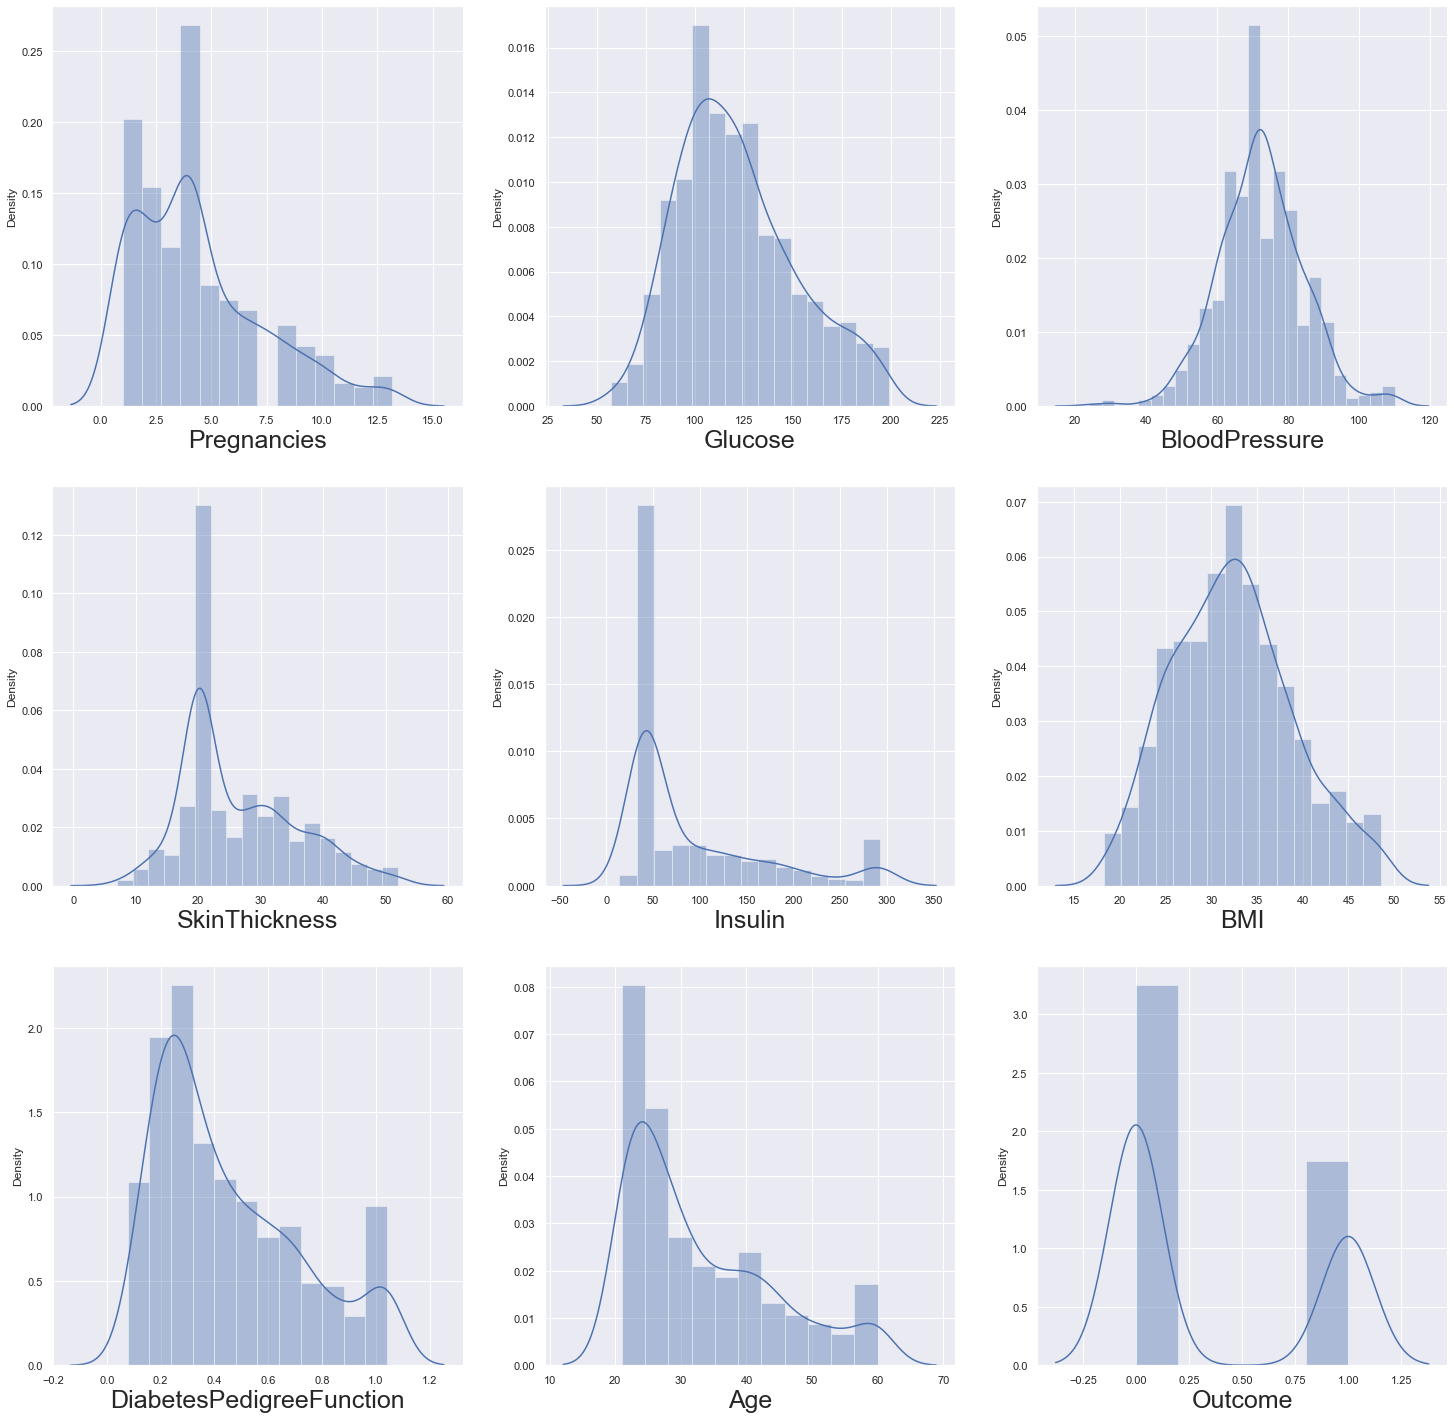

In [37]:
plt.figure(figsize=(25,25),facecolor='white')
plotnumber = 1
for column in df.columns:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
    
plt.show()
    

In [38]:
x = df.drop('Outcome',axis=1)
y = df['Outcome']
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.000000,41.0,33.6,0.6270,50
1,1.0,85.0,66.0,29.000000,41.0,26.6,0.3510,31
2,8.0,183.0,64.0,20.199656,41.0,23.3,0.6720,32
3,1.0,89.0,66.0,23.000000,94.0,28.1,0.1670,21
4,4.0,137.0,40.0,35.000000,168.0,43.1,1.0409,33


In [39]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: Futu

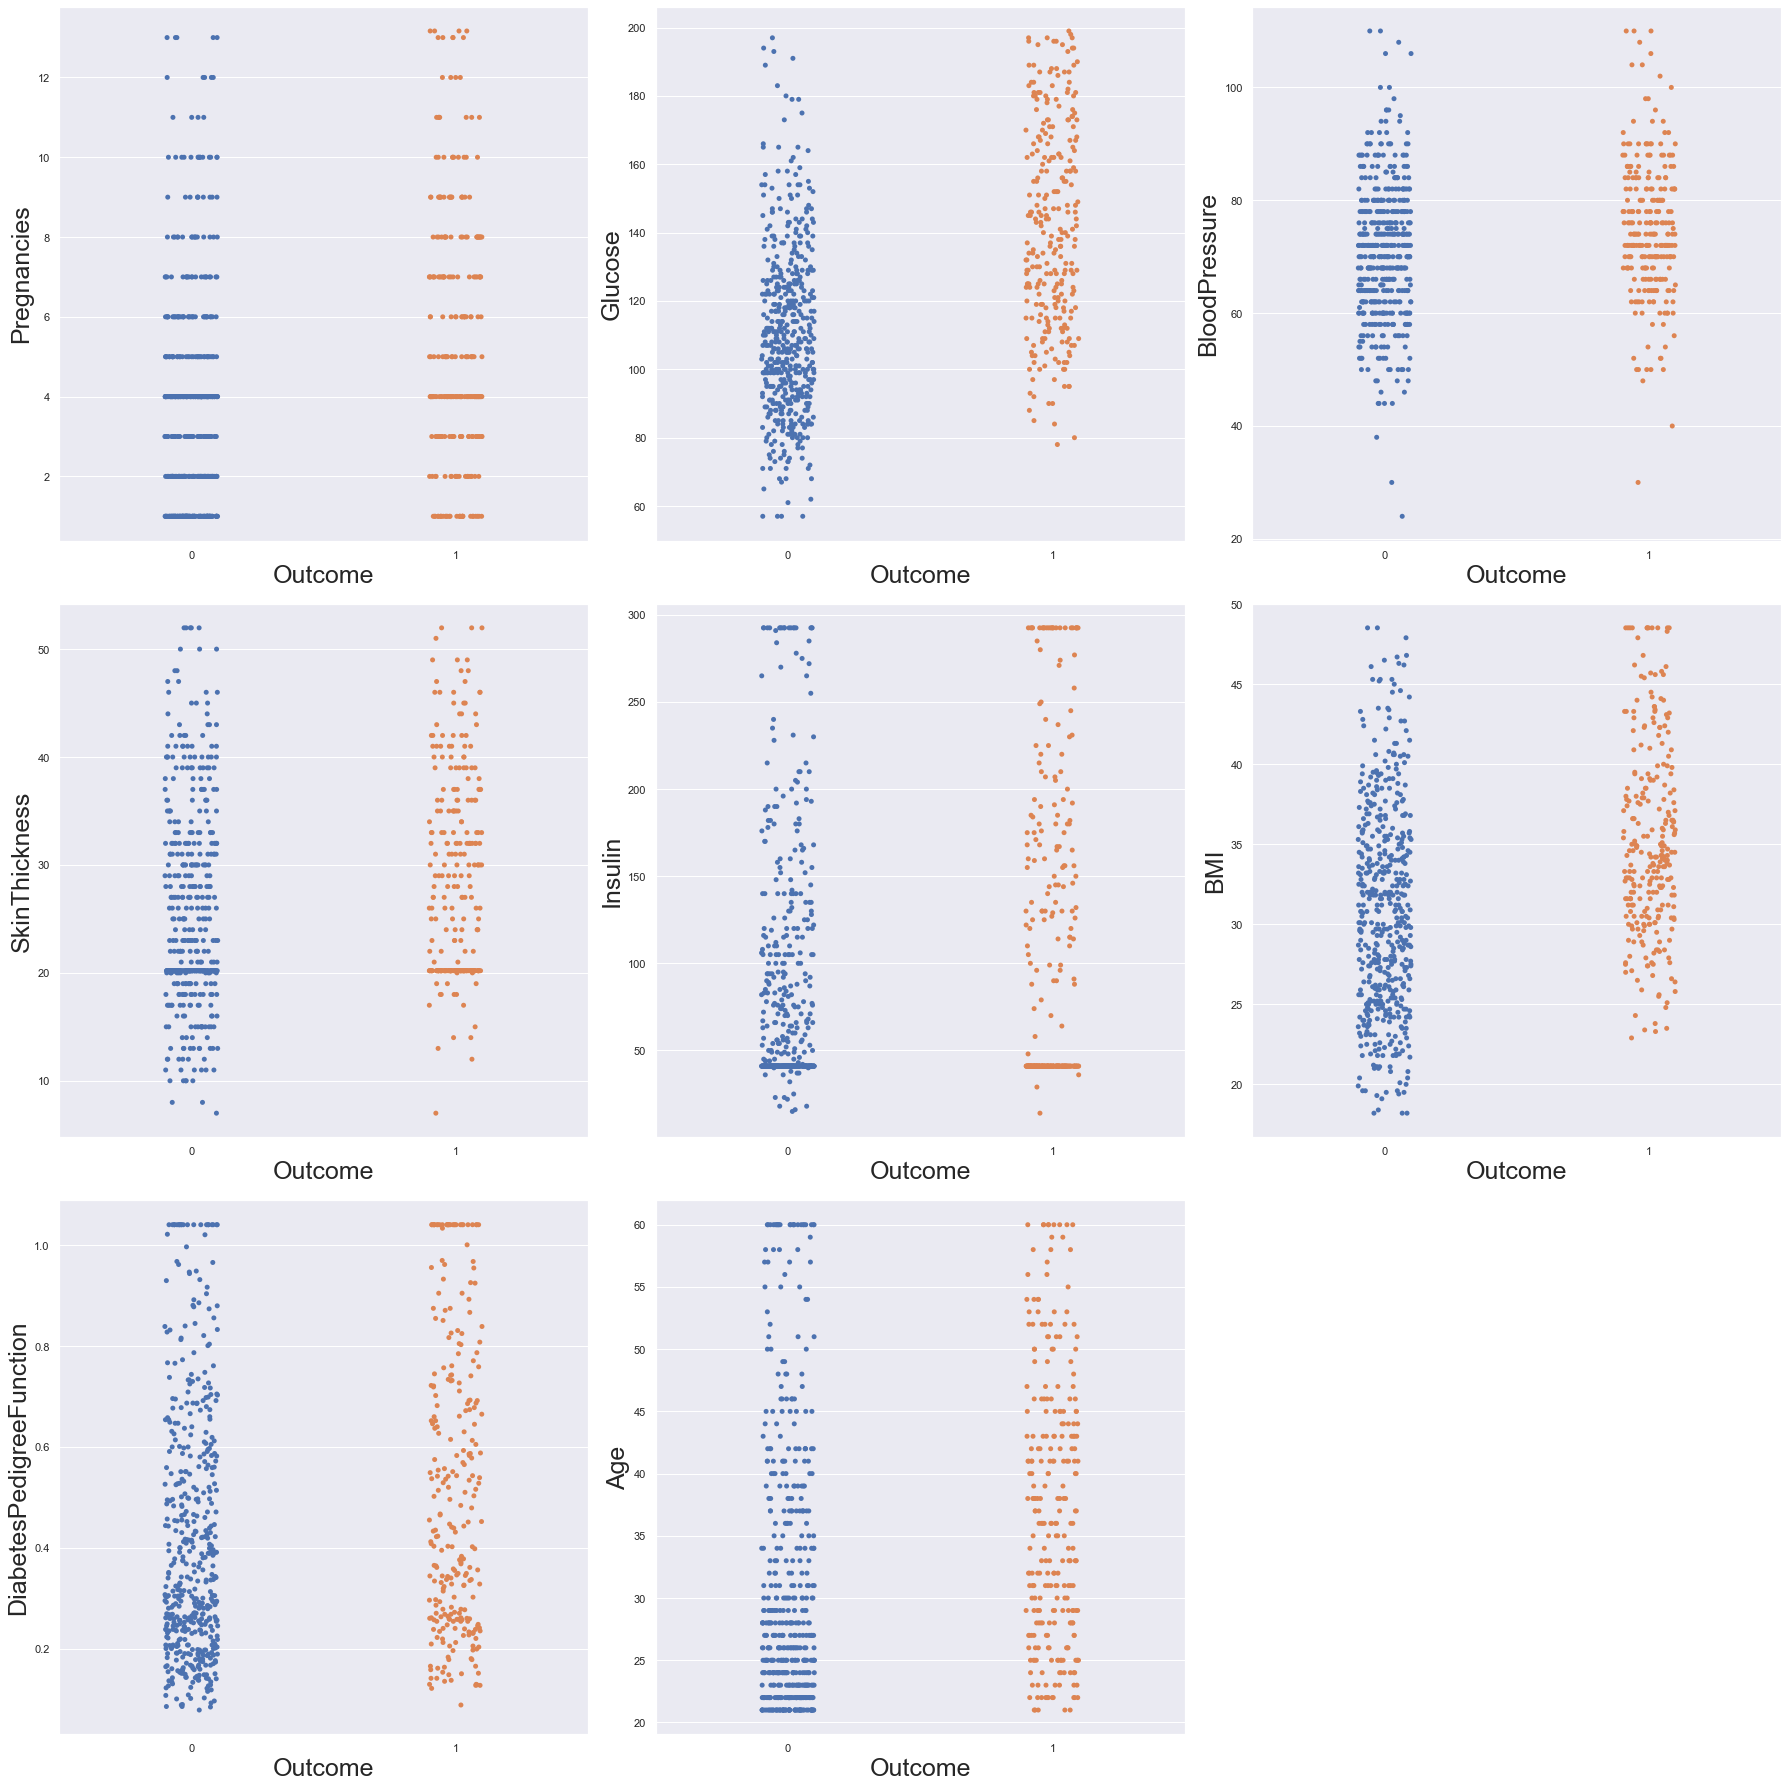

In [40]:
plt.figure(figsize=(25,25),facecolor='white')
plotnumber = 1
for column in x.columns:
    if plotnumber <=9:
        plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[column])
        plt.xlabel("Outcome",fontsize=25)
        plt.ylabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

In [41]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)
y_scaled = y

In [42]:
x_scaled

array([[ 0.53847844,  0.86645439, -0.03046524, ...,  0.18749197,
         0.66253686,  1.51384382],
       [-1.15871381, -1.20761271, -0.52983777, ..., -0.8728735 ,
        -0.37516162, -0.18199596],
       [ 1.21735534,  2.01871389, -0.69629528, ..., -1.37276009,
         0.83172683, -0.09274124],
       ...,
       [ 0.19903999, -0.02243151, -0.03046524, ..., -0.93346582,
        -0.773698  , -0.27125069],
       [-1.15871381,  0.14217699, -1.02921029, ..., -0.34269076,
        -0.38268118,  1.24607964],
       [-1.15871381, -0.94423911, -0.19692275, ..., -0.29724653,
        -0.5105136 , -0.89603377]])

In [43]:
x_scaled.shape

(768, 8)

In [44]:
vif = pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features'] = x.columns


In [45]:
vif

,vif,features
0,1.449862,Pregnancies
1,1.319169,Glucose
2,1.256355,BloodPressure
3,1.530815,SkinThickness
4,1.316202,Insulin
5,1.577529,BMI
6,1.055847,DiabetesPedigreeFunction
7,1.594790,Age


In [46]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.25,random_state=1)

In [47]:
log_reg = LogisticRegression(verbose=1)
log_reg.fit(x_train,y_train)

[LibLinear]

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:430: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  warnings.warn("Default solver will be changed to 'lbfgs' in 0.22. "


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=1,
                   warm_start=False)

In [48]:
import pickle
with open ('logistic_reg.sav','wb') as f:
    pickle.dump(log_reg,f)

In [49]:
with open ('standardscalar.sav', 'wb') as f:
    pickle.dump(scaler,f)

In [50]:
y_pred_train = log_reg.predict(x_train)
y_pred_train

C:\Anaconda\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,

In [51]:
y_train =np.array(y_train)
y_train

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

In [52]:
accuracy_train = accuracy_score(y_train,y_pred_train)
accuracy_train

0.7725694444444444

In [53]:
y_pred_test = log_reg.predict(x_test)

C:\Anaconda\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [54]:
accuracy_test = accuracy_score(y_test,y_pred_test)
accuracy_test

0.7916666666666666

In [55]:
lr_prob_train = log_reg.predict_proba(x_train)
lr_prob_train

array([[0.89522431, 0.10477569],
       [0.8959356 , 0.1040644 ],
       [0.21769504, 0.78230496],
       ...,
       [0.13410823, 0.86589177],
       [0.10971118, 0.89028882],
       [0.62367545, 0.37632455]])

In [56]:
lr_prob1_train = lr_prob_train[:,1]
lr_prob1_train

array([0.10477569, 0.1040644 , 0.78230496, 0.09880856, 0.40478162,
       0.10421372, 0.28296586, 0.69259004, 0.94606663, 0.3651553 ,
       0.09462045, 0.14827767, 0.62565944, 0.84100488, 0.04774636,
       0.13579531, 0.14729546, 0.83337013, 0.06548059, 0.40617162,
       0.19471763, 0.72834275, 0.07734175, 0.40679115, 0.25300341,
       0.02899193, 0.2900364 , 0.3676912 , 0.11309367, 0.06068455,
       0.04984063, 0.93348083, 0.26154458, 0.28218676, 0.11102431,
       0.08338658, 0.03654514, 0.91334264, 0.32515172, 0.77328264,
       0.22461527, 0.08253093, 0.21044311, 0.25003324, 0.65081556,
       0.46049306, 0.49929885, 0.19801031, 0.21495593, 0.13409193,
       0.07350463, 0.21913841, 0.24517515, 0.1894102 , 0.33478036,
       0.25304148, 0.07954855, 0.08452539, 0.21600073, 0.54232923,
       0.06460159, 0.21176442, 0.15134762, 0.56834182, 0.32591221,
       0.2692501 , 0.37059714, 0.52801285, 0.53425915, 0.39724723,
       0.24309115, 0.09646402, 0.10328037, 0.03415332, 0.03313

In [57]:
fpr,tpr,thresholds = roc_curve(y_train,lr_prob1_train)
fpr

array([0.        , 0.00265252, 0.00265252, 0.00530504, 0.00530504,
       0.00795756, 0.00795756, 0.01061008, 0.01061008, 0.0132626 ,
       0.0132626 , 0.01591512, 0.01591512, 0.01856764, 0.01856764,
       0.02122016, 0.02122016, 0.02387268, 0.02387268, 0.0265252 ,
       0.0265252 , 0.02917772, 0.02917772, 0.03183024, 0.03183024,
       0.03448276, 0.03448276, 0.0397878 , 0.0397878 , 0.04244032,
       0.04244032, 0.04509284, 0.04509284, 0.05039788, 0.05039788,
       0.0530504 , 0.0530504 , 0.05570292, 0.05570292, 0.05835544,
       0.05835544, 0.066313  , 0.066313  , 0.06896552, 0.06896552,
       0.07161804, 0.07161804, 0.08222812, 0.08222812, 0.08753316,
       0.08753316, 0.09018568, 0.09018568, 0.0928382 , 0.0928382 ,
       0.10344828, 0.10344828, 0.11405836, 0.11405836, 0.12732095,
       0.12732095, 0.13793103, 0.13793103, 0.14058355, 0.14058355,
       0.14323607, 0.14323607, 0.14854111, 0.14854111, 0.16445623,
       0.16445623, 0.16710875, 0.16710875, 0.16976127, 0.16976

In [58]:
tpr

array([0.        , 0.        , 0.00502513, 0.00502513, 0.02512563,
       0.02512563, 0.03517588, 0.03517588, 0.07537688, 0.07537688,
       0.09547739, 0.09547739, 0.13567839, 0.13567839, 0.1959799 ,
       0.1959799 , 0.20100503, 0.20100503, 0.23115578, 0.23115578,
       0.27638191, 0.27638191, 0.34673367, 0.34673367, 0.35175879,
       0.35175879, 0.36180905, 0.36180905, 0.38190955, 0.38190955,
       0.4120603 , 0.4120603 , 0.41708543, 0.41708543, 0.4321608 ,
       0.4321608 , 0.43718593, 0.43718593, 0.45728643, 0.45728643,
       0.47236181, 0.47236181, 0.47738693, 0.47738693, 0.48241206,
       0.48241206, 0.48743719, 0.48743719, 0.49246231, 0.49246231,
       0.51758794, 0.51758794, 0.53266332, 0.53266332, 0.54773869,
       0.54773869, 0.55778894, 0.55778894, 0.56281407, 0.56281407,
       0.57286432, 0.57286432, 0.57788945, 0.57788945, 0.58291457,
       0.58291457, 0.5879397 , 0.5879397 , 0.60301508, 0.60301508,
       0.61809045, 0.61809045, 0.62311558, 0.62311558, 0.63819

In [59]:
thresholds

array([1.95906061, 0.95906061, 0.95755139, 0.95467587, 0.93508206,
       0.93375565, 0.92911397, 0.92122001, 0.90215567, 0.90027328,
       0.88951871, 0.88676059, 0.85466586, 0.85449765, 0.83457966,
       0.83383883, 0.83337013, 0.83161366, 0.80497509, 0.80412168,
       0.77773232, 0.7758966 , 0.72834275, 0.72415704, 0.72294454,
       0.72007454, 0.71577097, 0.70766854, 0.69122136, 0.6897064 ,
       0.68039505, 0.67526605, 0.67296233, 0.67038659, 0.66958111,
       0.65081556, 0.64782852, 0.64733128, 0.63333806, 0.63301186,
       0.62565944, 0.61564901, 0.61260704, 0.60717072, 0.60713073,
       0.60455514, 0.5868085 , 0.57852167, 0.57549521, 0.56834182,
       0.55031023, 0.54850292, 0.5449053 , 0.54490017, 0.54232923,
       0.53279808, 0.52801285, 0.50060269, 0.49929885, 0.47946847,
       0.47840966, 0.46996884, 0.46868009, 0.46750044, 0.46599746,
       0.46049306, 0.45666156, 0.45580416, 0.4517644 , 0.43970932,
       0.42723362, 0.42389242, 0.42284233, 0.42232768, 0.41742

In [60]:
auc_train = roc_auc_score(y_train,lr_prob1_train)
auc_train

0.8401823440811484

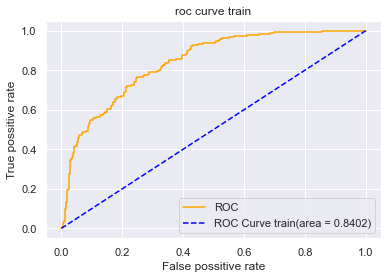

In [61]:
plt.plot(fpr,tpr,color= "orange",label = "ROC")
plt.plot([0,1],[0,1],color='blue',linestyle='--',label='ROC Curve train(area = %0.4f)' % auc_train)
plt.xlabel('False possitive rate')
plt.ylabel('True possitive rate')
plt.title('roc curve train')
plt.legend()
plt.show()



In [62]:
lr_prob_test = log_reg.predict_proba(x_test)
lr_prob_test = lr_prob_test[:,1]
lr_prob_test

array([0.44096703, 0.2441235 , 0.12028695, 0.04859948, 0.20536591,
       0.3749828 , 0.36979352, 0.07881532, 0.13618498, 0.26991161,
       0.43398049, 0.06842607, 0.9566704 , 0.79803385, 0.36360932,
       0.755104  , 0.22693929, 0.30939498, 0.0310444 , 0.16440347,
       0.42847223, 0.14554315, 0.95956846, 0.25465017, 0.06171273,
       0.41168369, 0.18103829, 0.80158913, 0.13383146, 0.50246706,
       0.47891105, 0.13857807, 0.04830325, 0.81309248, 0.19207112,
       0.66815678, 0.08481131, 0.18251143, 0.10889034, 0.68000946,
       0.30536777, 0.11478908, 0.03296807, 0.26973941, 0.06385925,
       0.01414181, 0.72618863, 0.8083323 , 0.06511579, 0.12585522,
       0.03642277, 0.20425334, 0.85973573, 0.03782568, 0.84597716,
       0.10736299, 0.34085581, 0.32728191, 0.48245709, 0.14662035,
       0.6826401 , 0.06001569, 0.77922714, 0.18365724, 0.50917044,
       0.09012089, 0.48457849, 0.46363527, 0.7598351 , 0.66349814,
       0.88818587, 0.84011591, 0.68625471, 0.01267057, 0.71237

In [63]:
fpr,tpr,thresholds = roc_curve(y_test,lr_prob_test)
thresholds

array([1.97300552, 0.97300552, 0.85973573, 0.84776014, 0.84597716,
       0.84011591, 0.81309248, 0.81287737, 0.76527   , 0.7598351 ,
       0.7425506 , 0.73951543, 0.70449767, 0.68625471, 0.68614541,
       0.6826401 , 0.68061474, 0.68000946, 0.65322469, 0.63008473,
       0.58089629, 0.57956532, 0.48457849, 0.48154852, 0.46363527,
       0.45587209, 0.44301801, 0.43398049, 0.42847223, 0.41943721,
       0.41805521, 0.41168369, 0.40440689, 0.35428003, 0.33052631,
       0.31827156, 0.31389616, 0.29613615, 0.29407764, 0.26991161,
       0.26355968, 0.25993785, 0.25914023, 0.25588359, 0.25465017,
       0.23039282, 0.22693929, 0.19207112, 0.18843181, 0.18365724,
       0.18269455, 0.14662035, 0.14554315, 0.13043351, 0.12585522,
       0.01267057])

In [64]:
y_pred_test = log_reg.predict(x_test)
y_pred_test

C:\Anaconda\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [65]:
auc_test= roc_auc_score(y_test,y_pred_test)
auc_test

0.7546836337928597

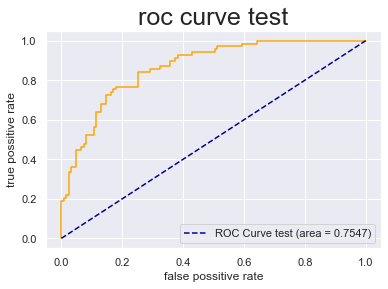

In [66]:
plt.plot(fpr,tpr,color = 'orange')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve test (area = %0.4f)' % auc_test)
plt.xlabel('false possitive rate')
plt.ylabel('true possitive rate')
plt.title('roc curve test',fontsize=25)
plt.legend()
plt.show()

In [67]:
accuracy_train,auc_train

(0.7725694444444444, 0.8401823440811484)

In [68]:
accuracy_test,auc_test

(0.7916666666666666, 0.7546836337928597)

In [69]:
from sklearn.metrics import classification_report

In [70]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       377
           1       0.72      0.56      0.63       199

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.76       576



In [71]:
len(x_test)

192

In [72]:
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

C:\Anaconda\lib\site-packages\sklearn\decomposition\online_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
C:\Anaconda\lib\site-packages\sklearn\ensemble\gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
C:\Anaconda\lib\site-packages\sklea

# AdaBoost

In [73]:
ada_model = AdaBoostClassifier()
ada_model.fit(x_train,y_train)
train_ada_prob = ada_model.predict_proba(x_train)
test_ada_prob = ada_model.predict_proba(x_test)
auc_train_ada = roc_auc_score(y_train,train_ada_prob[:,1])
auc_test_ada = roc_auc_score(y_test,test_ada_prob[:,1])




C:\Anaconda\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Anaconda\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addi

C:\Anaconda\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Anaconda\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addi

In [74]:
auc_train_ada

0.9058555376351253

In [75]:
auc_test_ada

0.8437021326735007

In [76]:
y_pred_ada=ada_model.predict(x_test)

accuracy_score(y_test,y_pred_ada)

0.7708333333333334

# RandomForest 

In [77]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
rf_prob_train = rf_model.predict_proba(x_train)
auc_rf_train = roc_auc_score(y_train,rf_prob_train[:,1])
rf_prob_test = rf_model.predict_proba(x_test)
auc_rf_test = roc_auc_score(y_test,rf_prob_test[:,1])

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:244: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  warn("The default value of n_estimators will change from "
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Anaconda\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int

In [78]:
auc_rf_train

0.9995134825320235

In [79]:
auc_rf_test

0.8567809591139389

In [80]:
y_pred_rf=rf_model.predict(x_test)

accuracy_score(y_test,y_pred_rf)

C:\Anaconda\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


0.78125

# KNNClassifier

In [81]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)
knn_prob_train = knn_model.predict_proba(x_train)
auc_knn_train = roc_auc_score(y_train,knn_prob_train[:,1])
knn_prob_test = knn_model.predict_proba(x_test)
auc_knn_test = roc_auc_score(y_test,knn_prob_test[:,1])

C:\Anaconda\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


In [82]:
auc_knn_train

0.8756048145235461

In [83]:
auc_knn_test

0.7848474136915282

In [84]:
y_pred_knn=knn_model.predict(x_test)

accuracy_score(y_test,y_pred_knn)

0.734375

In [85]:
pred=[]
for model in [rf_model,log_reg,ada_model,knn_model]:
    pred.append(pd.Series(model.predict_proba(x_test)[:,1]))



C:\Anaconda\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [86]:
final_prediction = pd.concat(pred,axis=1).mean(axis=1)
final_prediction

0      0.434455
1      0.329507
2      0.226457
3      0.218223
4      0.250416
5      0.342138
6      0.391796
7      0.123359
8      0.206322
9      0.238033
10     0.409416
11     0.161102
12     0.620988
13     0.727388
14     0.487617
15     0.641640
16     0.305236
17     0.578267
18     0.085224
19     0.290971
20     0.481062
21     0.307142
22     0.743923
23     0.411915
24     0.135170
25     0.527014
26     0.295372
27     0.754488
28     0.231569
29     0.474595
30     0.443099
31     0.382576
32     0.167487
33     0.606225
34     0.371769
35     0.517921
36     0.168905
37     0.295521
38     0.133003
39     0.619389
40     0.349703
41     0.150757
42     0.086723
43     0.414805
44     0.184314
45     0.081582
46     0.657474
47     0.730612
48     0.134045
49     0.227796
50     0.136797
51     0.349540
52     0.669690
53     0.127650
54     0.738003
55     0.224223
56     0.484068
57     0.329157
58     0.342753
59     0.308998
60     0.522235
61     0.158568
62     0

In [87]:
final_auc = roc_auc_score(y_test,final_prediction)
final_auc

0.8740426534700129

In [88]:
fpr,tpr,thresholds = roc_curve(y_test,final_prediction)
thresholds

array([1.84277825, 0.84277825, 0.71848827, 0.71393953, 0.71207465,
       0.71023948, 0.70356801, 0.68715718, 0.68535289, 0.68304852,
       0.64723238, 0.64245595, 0.64164014, 0.62698292, 0.62098821,
       0.61938865, 0.61199933, 0.60903978, 0.59406162, 0.59199974,
       0.59102123, 0.56417039, 0.55075695, 0.53457653, 0.52762554,
       0.52223482, 0.507033  , 0.48761703, 0.48106233, 0.47940195,
       0.45823243, 0.4476633 , 0.43734812, 0.43445528, 0.41480458,
       0.41444098, 0.41191487, 0.40941584, 0.40282171, 0.38257565,
       0.37283977, 0.37176932, 0.36985875, 0.31204702, 0.30932277,
       0.30899832, 0.30523567, 0.29537195, 0.29530963, 0.23058649,
       0.22779599, 0.21822294, 0.2168613 , 0.07611459])

In [89]:
accuracy_is = []
for thr in thresholds:
    y_pred = np.where(final_prediction>thr,1,0)
    accuracy_is.append(accuracy_score(y_test,y_pred,normalize=True))
accuracy_is = pd.concat([pd.Series(thresholds),pd.Series(accuracy_is)],axis=1)
accuracy_is.columns = ['thresholds','accuracy']
accuracy_is = accuracy_is.sort_values(by='accuracy',ascending=False)

In [90]:
print(accuracy_is)

    thresholds  accuracy
33    0.434455  0.828125
35    0.414441  0.828125
32    0.437348  0.822917
36    0.411915  0.822917
34    0.414805  0.822917
30    0.458232  0.817708
37    0.409416  0.817708
31    0.447663  0.812500
38    0.402822  0.812500
29    0.479402  0.791667
28    0.481062  0.786458
27    0.487617  0.781250
39    0.382576  0.781250
41    0.371769  0.781250
40    0.372840  0.776042
42    0.369859  0.776042
26    0.507033  0.776042
19    0.592000  0.770833
18    0.594062  0.765625
20    0.591021  0.765625
24    0.527626  0.760417
25    0.522235  0.760417
23    0.534577  0.760417
21    0.564170  0.760417
22    0.550757  0.760417
17    0.609040  0.750000
13    0.626983  0.744792
16    0.611999  0.744792
15    0.619389  0.744792
12    0.641640  0.744792
11    0.642456  0.744792
10    0.647232  0.739583
14    0.620988  0.739583
7     0.687157  0.703125
9     0.683049  0.703125
3     0.713940  0.703125
5     0.710239  0.703125
43    0.312047  0.697917
45    0.308998  0.697917


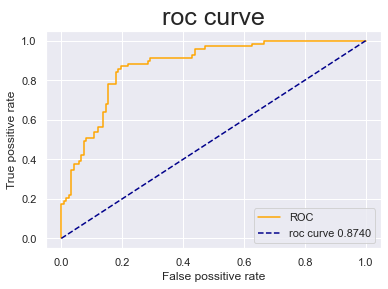

In [91]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],linestyle='--',color='darkblue',label='roc curve %0.4f'%final_auc)
plt.xlabel('False possitive rate')
plt.title('roc curve',fontsize=25)
plt.ylabel('True possitive rate')
plt.legend()
plt.show()
